### Build all the candidate variables for Project 2

Include two risk table variables: likelihood of fraud for that day of the week and for that state.

Don’t use the OOT data to calculate the risk tables.

Provide basic statistics for all candidate variables:
Min, max, mean, stdev

Then get started with your feature selection code, results 

In [34]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import log10
%matplotlib inline
start_time = pd.datetime.now()
import copy
import datetime
import scipy.stats as stats

In [8]:
mydata = pd.read_excel('card transactions.xlsx') #,converters={'Merchnum': lambda x: str(x)

In [14]:
mydata.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

### Remove 

1. Single large transaction outlier

2. All but the “P” type transactions

52714    3102045.53
47339      47900.00
59516      30372.46
80886      28392.84
89673      27218.00
            ...    
47165          0.08
57855          0.02
91179          0.01
56124          0.01
78387          0.01
Name: Amount, Length: 96753, dtype: float64

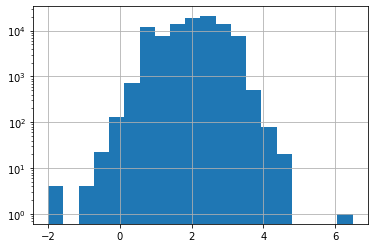

In [4]:
#1. Remove Single large transaction outlier
np.log10(mydata['Amount']).hist(bins=20)
plt.yscale('log')

mydata['Amount'].sort_values(ascending = False)

#### Only one outlier in the amount, 3102045.53, so we remove this one.

In [9]:
df=mydata[mydata['Amount']!=3102045.53]

In [10]:
# Remove all but the “P” type transactions
df=df[df['Transtype']=='P']

In [15]:
df.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96397.000000,9.639700e+04,92097.000000,96397.000000,96397.000000
mean,48365.481820,5.142202e+09,44706.596740,395.858494,0.010986
std,27945.003883,5.565825e+04,28369.537945,832.330197,0.104236
min,1.000000,5.142110e+09,1.000000,0.010000,0.000000
25%,24154.000000,5.142152e+09,20855.000000,33.460000,0.000000
50%,48365.000000,5.142196e+09,38118.000000,137.980000,0.000000
75%,72578.000000,5.142245e+09,63103.000000,428.250000,0.000000
max,96753.000000,5.142847e+09,99999.000000,47900.000000,1.000000


In [13]:
df['Merchnum'].sort_values(ascending=False)

30370    PENNE9 CO #68
6534     PENNE9 CO #05
38452      JCPENNE9 CO
53557      JCPENNE9 CO
44789      JCPENNE9 CO
             ...      
96621              NaN
96651              NaN
96689              NaN
96720              NaN
96730              NaN
Name: Merchnum, Length: 96397, dtype: object

In [18]:
df['Merchnum']=df['Merchnum'].replace('0',np.nan)

In [21]:
print(df.isna().sum()) 

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3251
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64


### Fill na

In [ ]:
#Merchnum: first fill the column with the number that has discription

In [133]:
df_filled=copy.copy(df)

In [134]:
#fill state
df_filled["Merch state"]= df_filled.groupby(['Merch description'])["Merch state"].apply(lambda x: x.fillna(stats.mode(x)[0][0] if stats.mode(x)[0][0] != 0 else x.fillna(np.nan)))
df_filled['Merch state']=df_filled.groupby(['Cardnum'])["Merch state"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df_filled["Merch state"]= df_filled["Merch state"].fillna(df_filled["Merch state"].mode()[0]) 

In [137]:
#fill zip
df_filled["Merch zip"]= df_filled.groupby(['Merch description'])["Merch zip"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df_filled["Merch zip"]= df_filled.groupby(['Merch state'])["Merch zip"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df_filled["Merch zip"]= df_filled["Merch zip"].fillna(df_filled["Merch zip"].mode()[0]) 

In [138]:
#fill Merchnum: 
df_filled["Merchnum"]= df_filled.groupby(['Merch description'])["Merchnum"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df_filled["Merchnum"]= df_filled.groupby(['Merch zip'])["Merchnum"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df_filled["Merchnum"]= df_filled.groupby(['Merch state'])["Merchnum"].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [139]:
df_filled.isna().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

In [ ]:
df_filled.to_csv("df_filled.csv")